In [94]:
import numpy as np
import matplotlib.pylab as plt
import scipy.integrate

Bounds of the function

In [95]:
b_inf, b_sup = -3, 3


Useful functions

In [96]:
def plot_function(function_):
    # Générer des points dans la plage [b_inf, b_sup] pour le traçage
    x_values = np.linspace(b_inf, b_sup, 1000)

    # Calculer les valeurs de f_norm pour chaque point
    y_values = function_(x_values)
    # Tracer la courbe
    plt.plot(x_values, y_values, label='f(x) normalized')
    plt.title('Function')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.legend()
    return (np.min(y_values), np.max(y_values))

def plot_add_vertical_line(x, vertical_bounds, importance):
    plt.vlines(x=x, ymin=vertical_bounds[0], ymax=(vertical_bounds[1]-vertical_bounds[0])*(importance+1)/1.5+vertical_bounds[0], color='r', linestyle='--')

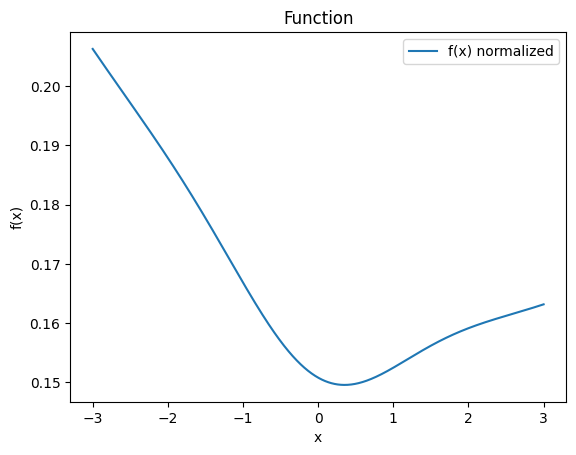

In [97]:
f = lambda x : 9 -np.exp(-x**2/2) + 0.1*(x-2)**2
integral_f = scipy.integrate.quad(f,b_inf,b_sup)[0]
f_norm = lambda x:f(x)/integral_f
vertical_bounds = plot_function(f_norm)
plt.show()

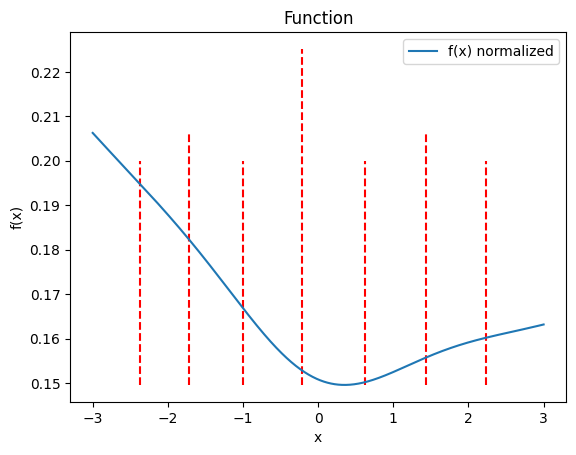

In [98]:
def get_barycenter(f, inf, sup, prec = None):
    F = lambda x: scipy.integrate.quad(f,inf,x)[0] - scipy.integrate.quad(f,x,sup)[0]
    prec = prec if prec != None else 4
    point = (inf+sup)/2
    for _ in range(prec):
        point = point - F(point)/(2*f(point))
    return point, F(point)

def get_slicings(list_):
    return [[list_[i], list_[i+1]] for i in range(len(list_)-1)]

max_depth = 3

list_milestones = np.array([b_inf, b_sup])
for depth in range(max_depth):
    slicings = get_slicings(list_milestones)
    new_slicings = np.zeros(len(slicings))
    for index, item in enumerate(slicings):
        inf = item[0]
        sup = item[1]
        new_slicing = get_barycenter(f_norm, inf, sup)[0]
        new_slicings[index] = new_slicing
        plot_add_vertical_line(new_slicing,vertical_bounds,1/(depth+1))
    list_milestones = np.sort(np.concatenate([list_milestones,new_slicings]))
plot_function(f_norm)
plt.show()